<a href="https://colab.research.google.com/github/Richish/hands_on_ml/blob/master/4_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normal equation

θ = (XTX)^(-1) ((X)T * y)

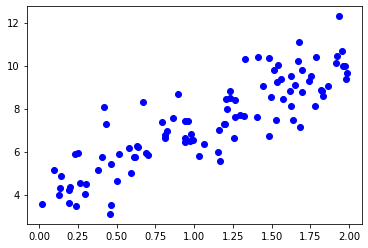

In [13]:
# lets try to generate linear looking data to test the above equation

import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

import matplotlib.pyplot as plt
plt.plot(X,y, 'ob')

In [14]:
# adding x0 = 1 to each X(for thete(0)X(0) term)
X_b = np.c_[np.ones((100,1)), X]
X_b

array([[1.        , 1.2145754 ],
       [1.        , 1.98381069],
       [1.        , 1.5746426 ],
       [1.        , 0.14192306],
       [1.        , 1.82458378],
       [1.        , 1.06258536],
       [1.        , 1.4955354 ],
       [1.        , 1.03467063],
       [1.        , 0.1964028 ],
       [1.        , 1.53584771],
       [1.        , 1.6983481 ],
       [1.        , 1.95629624],
       [1.        , 0.13332394],
       [1.        , 1.40665637],
       [1.        , 1.16199644],
       [1.        , 0.42138925],
       [1.        , 0.22787892],
       [1.        , 1.93578606],
       [1.        , 0.66783727],
       [1.        , 1.78381759],
       [1.        , 0.46230773],
       [1.        , 1.78347946],
       [1.        , 1.96341146],
       [1.        , 1.9245325 ],
       [1.        , 0.82636486],
       [1.        , 0.09315061],
       [1.        , 1.91515056],
       [1.        , 1.32555951],
       [1.        , 0.93826566],
       [1.        , 0.01912828],
       [1.

In [15]:
# 3 finding optimal theta

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best

array([[4.01123089],
       [3.07954814]])

In [16]:
theta_best.shape

(2, 1)

In [17]:
# making predictions using this theta

#let new X:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.01123089],
       [10.17032718]])

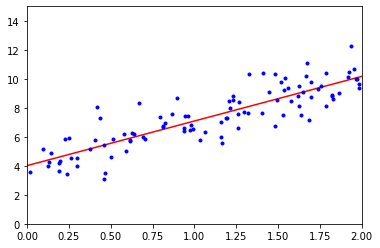

In [18]:
# plotting model's predictions

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

plt.axis([0, 2, 0, 15])
plt.show()


## Linear regression using sklearn

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
dir(lin_reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [20]:
lin_reg.intercept_, lin_reg.coef_

(array([4.01123089]), array([[3.07954814]]))

In [21]:
lin_reg.predict(X_new)

array([[ 4.01123089],
       [10.17032718]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [22]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[4.01123089],
        [3.07954814]]),
 array([104.39677114]),
 2,
 array([15.45662619,  3.72481104]))

np.linalg.lstsq calculated by dot product of pseudoinverse(moore-penrose inverse) of X with y.

pseudoinverse of any matrix can be calculated directly by using np.linalg.pinv()

In [24]:
np.linalg.pinv(X_b).dot(y)

array([[4.01123089],
       [3.07954814]])

The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ VT (see
numpy.linalg.svd()). The pseudoinverse is computed as X+ = VΣ+UT. To compute
the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny
threshold value, then it replaces all the non-zero values with their inverse, and finally
it transposes the resulting matrix. This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.

## computational complexity of normal equation

The Normal Equation computes the inverse of XT X, which is an (n + 1) × (n + 1)
matrix (where n is the number of features). The computational complexity of inverting
such a matrix is typically about O(n2.4) to O(n3) (depending on the implementation).
In other words, if you double the number of features, you multiply the computation
time by roughly 22.4 = 5.3 to 23 = 8.
The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n2). If
you double the number of features, you multiply the computation time by roughly 4.

Both the Normal Equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regards to the number of instances
in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory.

Once the model is trained:
predictions are very fast: the computational complexity
is linear with regards to both the number of instances you want to make predictions
on and the number of features.

Now we look at different ways to train a Linear Regression model, better
suited for cases where there are a large number of features, or too many training
instances to fit in memory.

# Gradient descent

The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

2 main problems of gradient descent:


1.   Local minima
2.   Being on a Plateau and then thinking that reached minima.

MSE for linear regression is however devoid of these problems. Reason:

MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.4 These two facts have a great consequence: Gradient Descent
is guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high).

MSE cost function for a Linear Regression is of the shape of a bowl, though the bowl can be elongated along various axes to different levels.

### When using Gradient Descent, you should ensure that all features
### have a similar scale (e.g., using Scikit-Learn’s StandardScaler
### class), or else it will take much longer to converge.


# Batch Gradient descent

To implement normal Gradient Descent(not batch), you need to compute the gradient of the cost function
with regards to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj just a little bit.

Whereas in batch gradient descent, we calculate all partial derivatives in in each step of gradient descent. That is in one go it looks over all the partial derivatives and all of training data. So it is very memory intensive.

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step (actually, Full Gradient Descent would probably
be a better name). As a result it is terribly slow on very large training
sets

However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hundreds
of thousands of features is much faster using Gradient
Descent than using the Normal Equation or SVD decomposition.

∇(θ).MSE(θ) = (2/m)(X.T)(X.theta-y)

The gradient vector, noted ∇θMSE(θ), contains all the
partial derivatives of the cost function (one for each model parameter).

θ(next step) = θ − η∇(θ).MSE(θ)


### Implementation of batch gradient descent using numpy

In [26]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of features

theta = np.random.randn(2,1) # random initialization of theta

for iteration in range(n_iterations):
    gradient = (2/m) * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradient
theta

array([[4.01123089],
       [3.07954814]])